In [16]:
import ROOT as r

In [17]:
import matplotlib.pyplot as plt

Event number i and tμ: 0 0
Event number i and tμ: 100 0.022349644925270695
Event number i and tμ: 200 2.264946834897273
Event number i and tμ: 300 -0.0010360698142903857
Event number i and tμ: 400 0.632121909649868
Event number i and tμ: 500 -0.0005831975577166304
Event number i and tμ: 600 -7.017247116891667e-05
Event number i and tμ: 700 0.4244477365646162
Event number i and tμ: 800 -2.8594222385436296e-06
Event number i and tμ: 900 -0.0006227393314475194
[#0] WARNING:InputArguments -- The parameter 'sigma' with range [-inf, inf] of the RooGaussian 'gauss' exceeds the safe range of (0, inf). Advise to limit its range.
[#1] INFO:ObjectHandling -- RooWorkspace::import() importing dataset shape1Data
[#1] INFO:ObjectHandling -- RooWorkSpace::import() changing name of dataset from  shape1Data to data_null

RooWorkspace()  contents

variables
---------
(bkgfrac,l,l1,mu,sigma,x)

p.d.f.s
-------
RooGaussian::gauss[ x=x mean=mu sigma=sigma ] = 1
RooAddPdf::model2[ bkgfrac * shape + [%] * gau

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



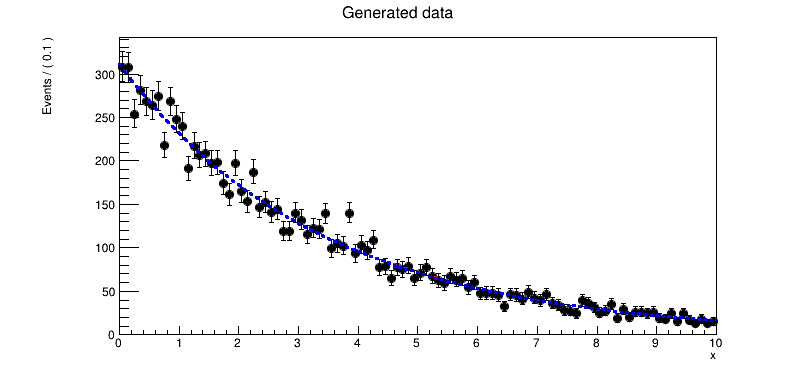

In [18]:
#seed = r.RooRandom.uniform()

#r.RooRandom.randomGenerator().SetSeed(seed)   
#r.RooRandom.randomGenerator().SetSeed(3001) 
t_μ_arr1 = []
tμ = 0
histogram = r.TH1F("histogram", "Sample Histogram;X-axis;Y-axis", 50, -.010, 10)
for i in range(1000):
    if i%100==0:
        print("Event number i and tμ:",i,tμ)
    wspace = r.RooWorkspace()                                                                                       
    wspace.factory("Gaussian::gauss(x[0,10],mu[5],sigma[.5])")                                       
    wspace.factory("Exponential::shape(x,l[-.3,-5,5])")  
#

    wspace.factory("SUM::model2(bkgfrac[.9,0.5,1.0]*shape,gauss)"); 
#
    #wspace.factory("Gaussian::gauss1(x[0,10],mu1[5,0,10],sigma1[.5,0.1,10])")                                       
    wspace.factory("Exponential::shape1(x,l1[-.3,-5,5])")   
    
    data_null = wspace.pdf("shape1").generate(r.RooArgSet(wspace.var("x")), 10000)
    getattr(wspace, 'import')(data_null, r.RooFit.Rename("data_null")) 

    x = wspace.var("x")
    model_data = wspace.pdf("model2")
    bkgonly_model = wspace.pdf("shape1")

    gauss = wspace.pdf("gauss")                                                                                     
    shape = wspace.pdf("shape")                                                                                     
                                                                                                                                                      
                                                                                                        
    wspace.Print()  
    xframe2 = x.frame(r.RooFit.Title("Generated data"))    
    result_null = model_data.fitTo(data_null,r.RooFit.Save())
    data_null.plotOn(xframe2)
    model_data.plotOn(xframe2,r.RooFit.LineColor(r.kRed),r.RooFit.LineStyle(r.kDashed))
    result = bkgonly_model.fitTo(data_null,r.RooFit.Save())
    bkgonly_model.plotOn(xframe2,r.RooFit.LineColor(r.kBlue),r.RooFit.LineStyle(r.kDashed))
    c2 = r.TCanvas("Exercise02","Exercise02",800,400) 
    r.gPad.SetLeftMargin(0.15) ; xframe2.GetYaxis().SetTitleOffset(1.6) ; xframe2.Draw() ;  
    c2.Draw()  
    likelihood = result.minNll()
    likelihood_null = result_null.minNll()
    tμ = 2*(likelihood - likelihood_null)
    t_μ_arr1.append(tμ)
    histogram.Fill(tμ)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


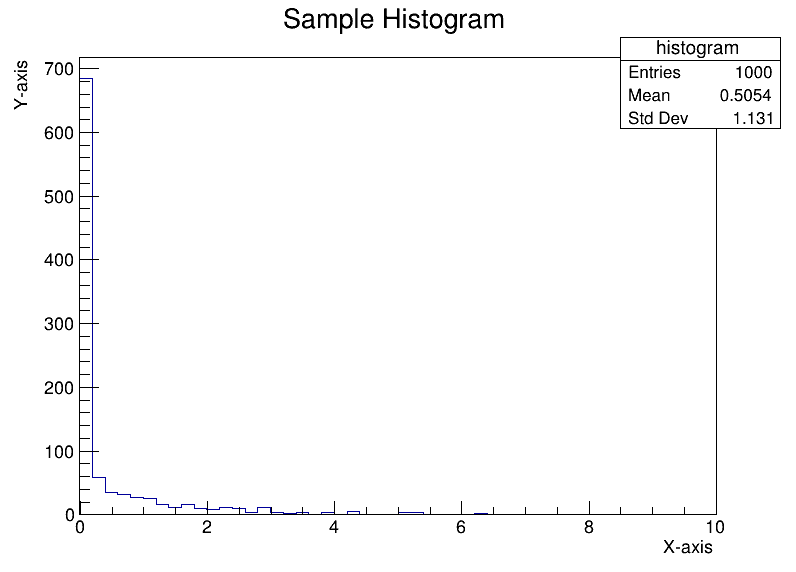

In [14]:
#histogram.SetBinContent(1, 0)
c1 = r.TCanvas("c1", "All the Histogram", 800, 600)
histogram.Draw()
c1.Draw()

### Save it in a root file
outfile = r.TFile("tvaldist.root","RECREATE")
histogram.Write()
outfile.Write()
outfile.Close()

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      27.3672
NDf                       =           30
Edm                       =  4.44303e-14
NCalls                    =          459
p0                        =      89.3466   +/-   8.82514     
p1                        =     0.989757   +/-   0.130303    
p2                        =      106.427   +/-   9.11573     
p3                        =    0.0139874   +/-   0.0681941   
p4                        =   0.00223932   +/-   5.84479e-05 


Error in <GSLError>: Error 21 in qags.c at 552 : bad integrand behavior found in the integration interval
Error in <GSLError>: Error 21 in qags.c at 552 : bad integrand behavior found in the integration interval
Error in <GSLError>: Error 21 in qags.c at 552 : bad integrand behavior found in the integration interval
Error in <GSLError>: Error 21 in qags.c at 552 : bad integrand behavior found in the integration interval
Error in <GSLError>: Error 21 in qags.c at 552 : bad integrand behavior found in the integration interval
Error in <GSLError>: Error 21 in qags.c at 552 : bad integrand behavior found in the integration interval
Error in <GSLError>: Error 21 in qags.c at 552 : bad integrand behavior found in the integration interval
Error in <GSLError>: Error 21 in qags.c at 552 : bad integrand behavior found in the integration interval
Error in <GSLError>: Error 21 in qags.c at 552 : bad integrand behavior found in the integration interval
Error in <GSLError>: Error 21 in qags.c at 552

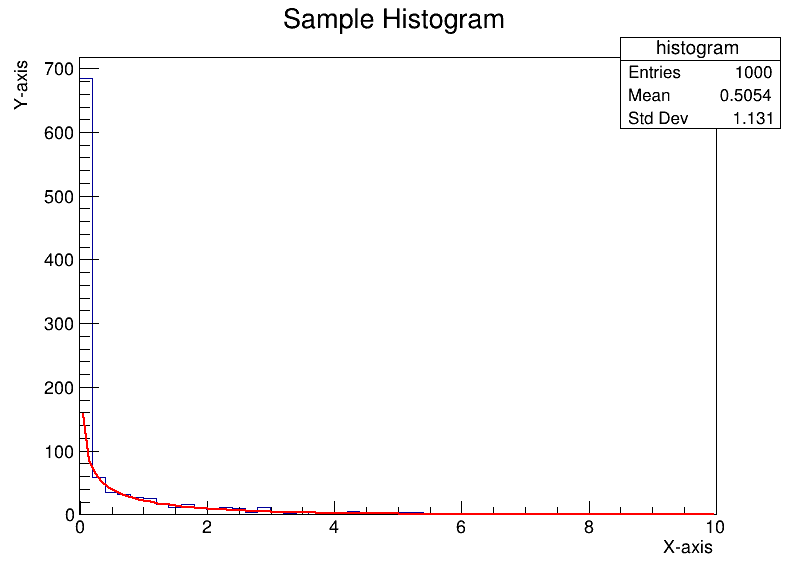

In [15]:

def chi2_func(x, par):
    # ROOT's TF1 needs a C-style function, this is a wrapper around the scipy.stats.chi2 PDF
    from scipy.stats import chi2
    return par[0] * chi2.pdf(x[0], df=par[1])
def delta_func(x, par):
    return par[2] * r.TMath.Gaus(x[0], par[3], par[4], True)
# Define the combined function
def combined_func(x, par):
    return chi2_func(x, par) + delta_func(x, par)

# Create a TF1 object for the combined function
combined_fit = r.TF1("combined_fit", combined_func, 0, 10, 5)
combined_fit.SetParameters(.5, 4, .5, 0, 0.1)  # Initial guess for parameters: normalization1, df, normalization2, mean, sigma

# Perform the fit
histogram.Fit(combined_fit, "RI")

# Draw the histogram and the fit result
c1 = r.TCanvas("c1", "Combined Fit", 800, 600)
histogram.Draw()
combined_fit.Draw("same")
c1.Draw()


# End here

In [4]:
def chi2_func(x, par):
    # ROOT's TF1 needs a C-style function, this is a wrapper around the scipy.stats.chi2 PDF
    from scipy.stats import chi2
    return par[0] * chi2.pdf(x[0], df=par[1])

Entries in bin 1 after modification: -486.0
****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =       487.03
NDf                       =            2
Edm                       =  6.31823e-08
NCalls                    =           59
p0                        =      7.47942   +/-   7.04955     
p1                        =      3.88464   +/-   1.61791     


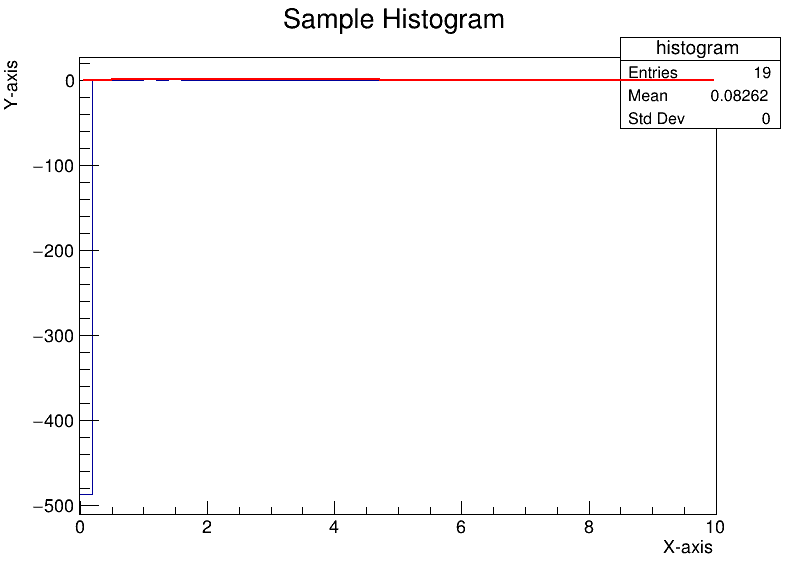

In [5]:
# Create a TF1 object for the chi-squared fit function
fit_func = r.TF1("fit_func", chi2_func, 0, 10, 2)
fit_func.SetParameters(1, 2)  # Initial guess for parameters (normalization, degrees of freedom)

# Perform the fit
bin_number = 1
current_content = histogram.GetBinContent(bin_number)
new_content = current_content - 500
histogram.SetBinContent(bin_number, new_content)

# Print the content of bin 50 after modification
print(f"Entries in bin {bin_number} after modification: {histogram.GetBinContent(bin_number)}")
# Draw the histogram and the fit result
histogram.Fit(fit_func, "R")
c1 = r.TCanvas("c1", "Chi2 Fit", 800, 600)
histogram.Draw()
fit_func.Draw("same")
c1.Draw()

t_μ_arr: [-0.00047564822307322174, 2.535976155581011, 0.48041744888178073, 1.865112960607803, 0.016546822007512674, 0.47164241336577106, -3.7717596569564193e-05, -0.00020771218260051683, 0.0002033483106060885, 0.1627960079931654, 0.9719520727230702, 0.3850125241660862, -2.442829281790182e-05, -0.0005451798933790997, 0.399532824230846, 4.624872642627452, 0.003097090324445162, -0.0006034127145539969, -8.27010371722281e-05, 0.003769355404074304, -0.00020240779122104868, 0.0005116608372190967, -1.628744212212041e-05, 1.8441762651127647, -0.00017507205484434962, -2.259908796986565e-05, 0.0001611362022231333, -7.348370854742825e-05, 0.06594525959371822, 0.2531745521046105, 0.14936481854238082, -1.564034027978778e-05, 4.477655602386221e-05, 0.67959349371813, 1.869424255186459, 0.9566328094661003, -0.00013320417929207906, 3.8858917832840234e-05, 0.0726475148985628, -0.0003336771405884065, -3.057008143514395e-05, -0.0007940531068015844, 0.029874203697545454, 0.37487513852101984, 0.2704315434893

(array([666.,  65.,  49.,  23.,  20.,  25.,  23.,  12.,  14.,   9.,  11.,
         12.,   5.,   9.,  11.,   8.,   3.,   2.,   4.,   1.,   5.,   2.,
          3.,   2.,   0.,   0.,   3.,   1.,   1.,   1.,   1.,   1.,   0.,
          0.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([-2.17562058e-03,  1.74517094e-01,  3.51209808e-01,  5.27902523e-01,
         7.04595237e-01,  8.81287952e-01,  1.05798067e+00,  1.23467338e+00,
         1.41136609e+00,  1.58805881e+00,  1.76475152e+00,  1.94144424e+00,
         2.11813695e+00,  2.29482967e+00,  2.47152238e+00,  2.64821510e+00,
         2.82490781e+00,  3.00160052e+00,  3.17829324e+00,  3.35498595e+00,
         3.53167867e+00,  3.70837138e+00,  3.88506410e+00,  4.06175681e+00,
         4.23844953e+00,  4.41514224e+00,  4.59183495e+00,  4.76852767e+00,
         4.94522038e+00,  5.12191310e+00,  5.29860581e+00,  5.47529853e+00,
         5.65199124e+00,  5.82868396e+00,  6.00537

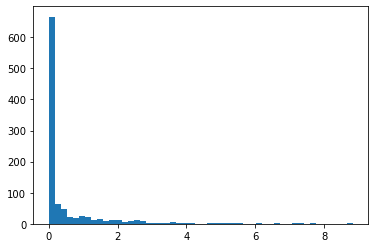

In [23]:
data = r.RooDataSet("data", "data", r.RooArgSet(x))

# Fill the dataset with values from t_μ_arr1
for value in t_μ_arr1:
    x.setVal(value)
    data.add(r.RooArgSet(x))

In [24]:
#fit_result = chi2_pdf.fitTo(data, r.RooFit.Save())

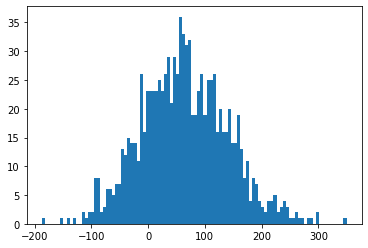